<a href="https://colab.research.google.com/github/aseelflihan/Violence-Against-Women-and-Girls/blob/main/Violence_Against_Women_and_Girls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seeing Through the Numbers:
# Uncovering the Reality of Violence Against Women and Girls

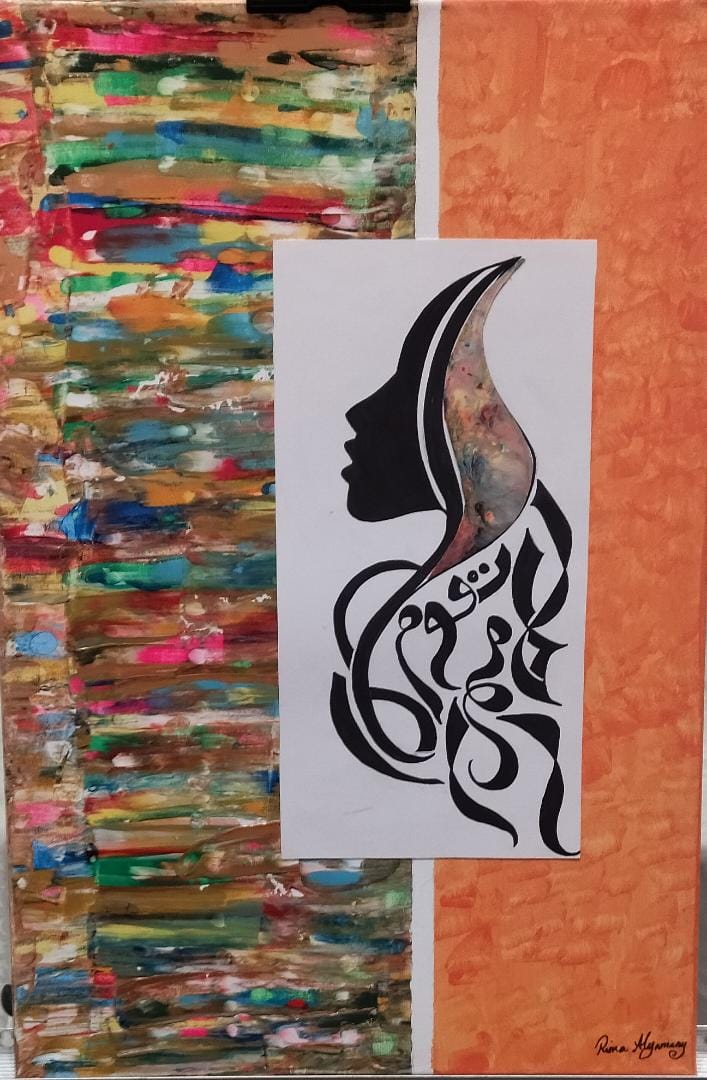


# Prepare

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [ ]:
df = pd.read_csv("violenceagainstwomenandgirls.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


# Process

In [ ]:
df.columns

Index(['RecordID', 'Country', 'Gender', 'Demographics Question',
       'Demographics Response', 'Question', 'Survey Year', 'Value'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Demographics Question': 'demographic_question',
                        'Demographics Response': 'demographic_response',
                        'Survey Year': 'survey_year',
                        'Value': 'percentage'})

In [ ]:
df.sample(n=10)

,RecordID,Country,Gender,demographic_question,demographic_response,Question,survey_year,percentage
2047,362,Cameroon,F,Employment,Unemployed,... for at least one specific reason,01-01-11,44.7
10636,340,Tajikistan,F,Age,25-34,... if she refuses to have sex with him,01-01-17,33.1
4170,374,Gabon,F,Age,15-24,... for at least one specific reason,01-01-12,55.0
624,74,Armenia,F,Marital status,Never married,... if she argues with him,01-01-15,4.7
3349,89,Dominican Republic,M,Age,25-34,... if she argues with him,01-01-13,1.0
11160,413,Togo,F,Age,15-24,... for at least one specific reason,01-01-13,26.8
7165,250,Malawi,M,Employment,Employed for kind,... if she neglects the children,01-01-15,7.6
8580,188,Nepal,M,Education,Higher,... if she goes out without telling him,01-01-16,2.9
1323,288,Bolivia,F,Education,Primary,... if she refuses to have sex with him,01-01-08,3.2
9055,261,Nigeria,F,Employment,Employed for kind,... if she neglects the children,01-01-13,37.0


In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

RecordID                0
Country                 0
Gender                  0
demographic_question    0
demographic_response    0
Question                0
survey_year             0
percentage              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11187 entries, 1 to 12599
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RecordID              11187 non-null  int64  
 1   Country               11187 non-null  object 
 2   Gender                11187 non-null  object 
 3   demographic_question  11187 non-null  object 
 4   demographic_response  11187 non-null  object 
 5   Question              11187 non-null  object 
 6   survey_year           11187 non-null  object 
 7   percentage            11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 786.6+ KB


In [ ]:
df['percentage'].mean()

19.762536873156343

In [ ]:
df.duplicated().sum()

0

#  Analysis the data

# Ask 



1.   **does a woman's education impact the likelihood of her experiencing violence ?**
3. **Is the prevalence of violence against women decreasing or increasing over time?**
5. **Are there cultural or societal factors that impact the likelihood of a woman experiencing violence ?** 
6. **Are there differences in the likelihood of men and women experiencing violence in different scenarios?**
7. **Are there scenarios in which men are more likely to experience violence than women?**
8. **Are women with higher levels of education less likely to experience violence in certain scenarios?**
9. **Are women who are unmarried or divorced more likely to experience violence in certain scenarios?**
10. **Are women in certain age groups more likely to experience violence in certain scenarios?**
11. **Are there certain demographic characteristics that are associated with more accepting attitudes towards violence against women?**


# Analyze

# 1) 

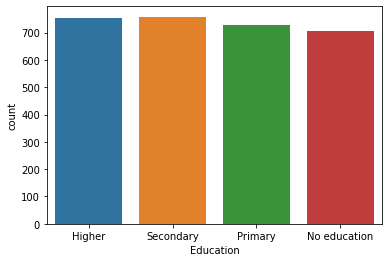

In [ ]:
# Create a countplot
sns.countplot(x="demographic_response", data=df[df["demographic_question"] == "Education"])

# Set the x-axis label
plt.xlabel("Education")

# Show the plot
plt.show()




**from the bar plot, it appears that the highest proportion 
of women who experienced violence have completed higher education , followed by women who completed secondary education, then those who completed primary education. The lowest proportion of women who experienced violence were those who reported having no education**





---



# 2)

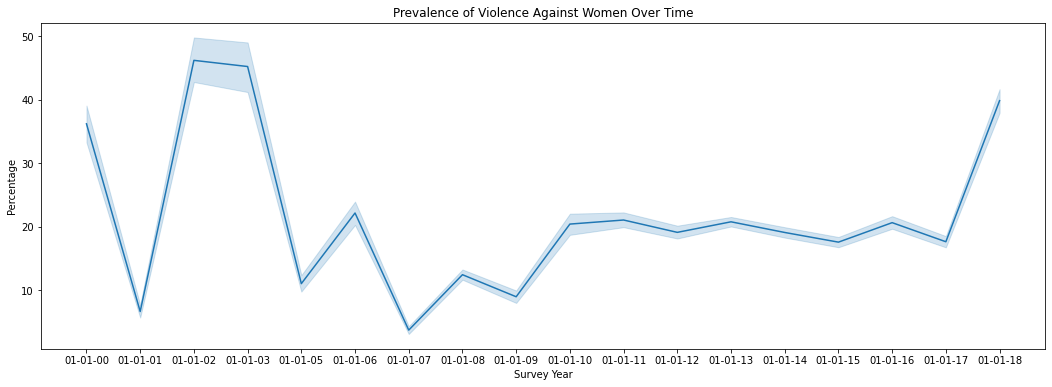

In [ ]:
# sort the dataframe by survey_year
df = df.sort_values(by="survey_year")

# create a line plot of the prevalence of violence against women over time
plt.figure(figsize=(18, 6))
sns.lineplot(x="survey_year", y="percentage", data=df)

# add title and axis labels
plt.title("Prevalence of Violence Against Women Over Time")
plt.xlabel("Survey Year")
plt.ylabel("Percentage")

# display the plot
plt.show()

**I observed that the prevalence of violence against women has increased from 2001 to 2005 and then decreased significantly. This decrease continued until 2018, with a slight increase in 2019. Overall, there seems to be a decreasing trend in the prevalence of violence against women over time, with some fluctuations in the short term**



---



# 3)

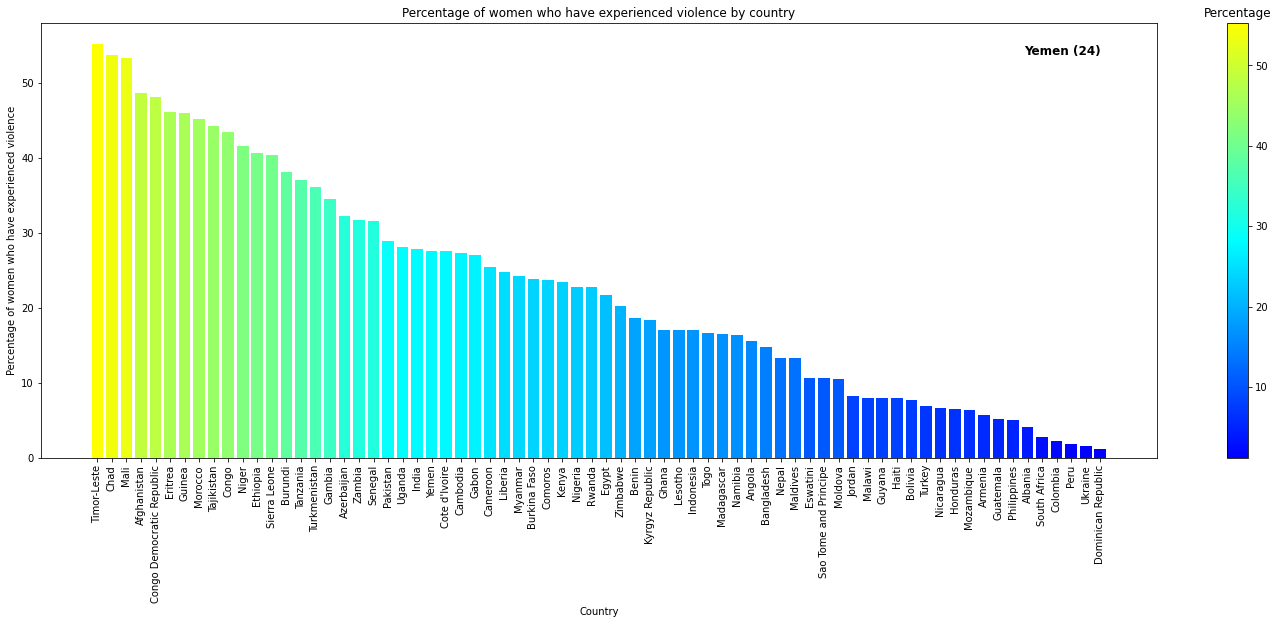

In [ ]:

# the relevant columns
df1 = df[['Country', 'Gender', 'percentage']]

# filter the dataframe to only include women
df_women = df1[df1['Gender'] == 'F']

# group the dataframe by country and calculate the mean percentage of women who have experienced violence
df_grouped = df_women.groupby('Country')['percentage'].mean().reset_index()

# sort the dataframe by percentage in descending order
df_sorted = df_grouped.sort_values('percentage', ascending=False)

# find the index of Yemen in the sorted dataframe
yemen_index = np.where(df_sorted['Country'] == 'Yemen')[0][0]

# create a color gradient for the bars
norm = mcolors.Normalize(vmin=df_sorted['percentage'].min(), vmax=df_sorted['percentage'].max())
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', [(0, 'blue'), (0.5, 'cyan'), (1, 'yellow')])

# create the bar chart with the color gradient
fig, ax = plt.subplots(figsize=(25,8))
bars = ax.bar(df_sorted['Country'], df_sorted['percentage'], color=cmap(norm(df_sorted['percentage'])))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Percentage of women who have experienced violence')
plt.title('Percentage of women who have experienced violence by country')

ax.text(0.95, 0.95, f"Yemen ({yemen_index + 1})", transform=ax.transAxes,
        horizontalalignment="right", verticalalignment="top", fontsize=12, fontweight="bold")


# add a color bar to show the gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm)
cbar.ax.set_title('Percentage')

plt.show()

According to the plot, Timor-Leste has the highest percentage of wives accepting or justifying violence, followed by Chad, Mali, and Afghanistan. Additionally, out of the 70 countries included in the dataset, my country ranks at the 24th position in terms of the percentage of women who have experienced violence.



---



# 4,5)

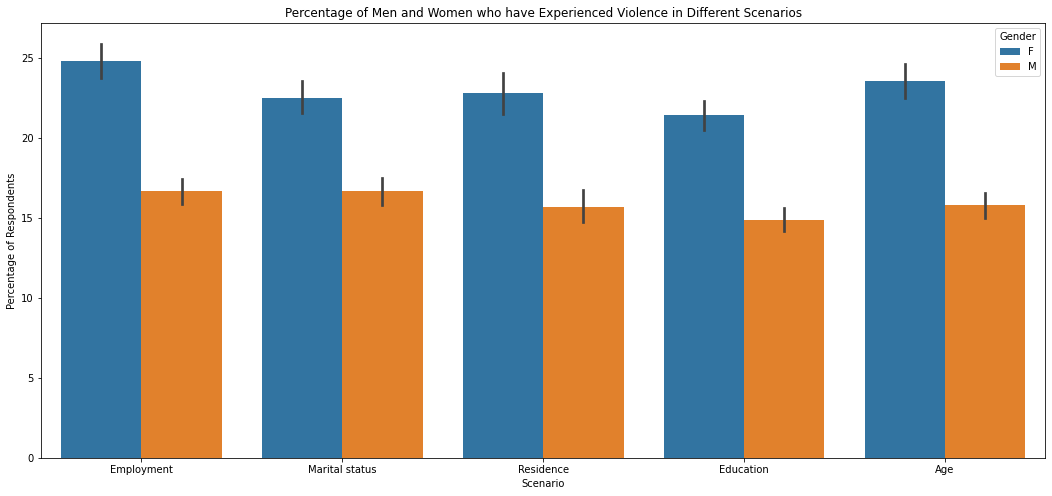

In [ ]:

fig, ax = plt.subplots(figsize=(18, 8))
# select the relevant columns
df1 = df[['Gender', 'demographic_question', 'percentage']]

# filter the dataframe to only include men and women
df2 = df1[(df1['Gender'] == 'F') | (df1['Gender'] == 'M')]

# create a bar plot
sns.barplot(x='demographic_question', y='percentage', hue='Gender', data=df2)


# set the plot title and axis labels
plt.title('Percentage of Men and Women who have Experienced Violence in Different Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Percentage of Respondents')

# show the plot
plt.show()


**as we see in the plot, we observe that women are more likely to experience violence across all scenarios compared to men.**



---



# 6)

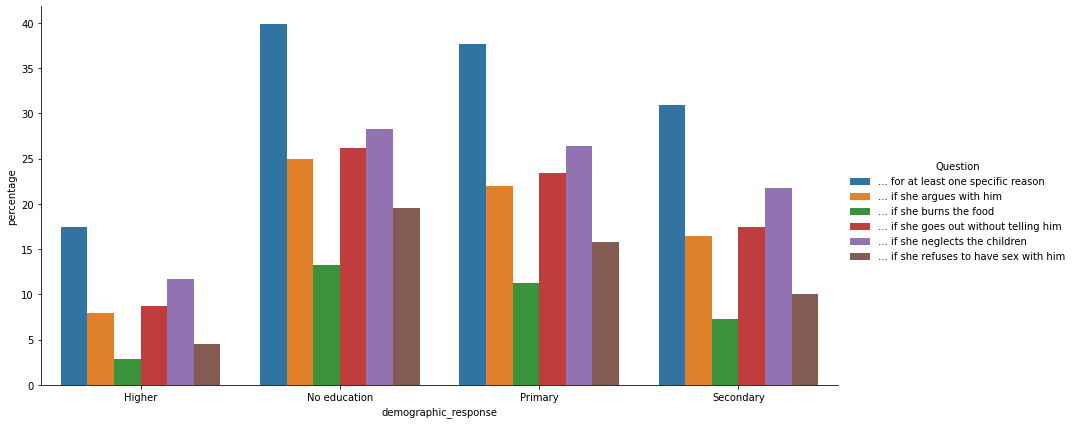

In [ ]:

# Filter the data for"Education"
df_education = df[df['demographic_question'] == 'Education']

# Group the data  
df_agg = df_education.groupby(['demographic_response', 'Question'])['percentage'].mean().reset_index()

# Create a bar plot to show the relationship between education level and the likelihood of experiencing violence in each scenario
sns.catplot(x='demographic_response', y='percentage', hue='Question', kind='bar', data=df_agg, height=6, aspect=2, errcolor='black', errwidth=1.5)
# show the plot
plt.show()

Based on the plot, it appears that women with higher levels of education are less likely to experience violence in certain scenarios. The most agreeable to violence are the least educated.

Regarding the reasons for violence, the most violent reasons are private reasons, followed by neglecting children, going out without telling him, and arguing with him. The least important reason for violence is if she burns food.



---



## 7)

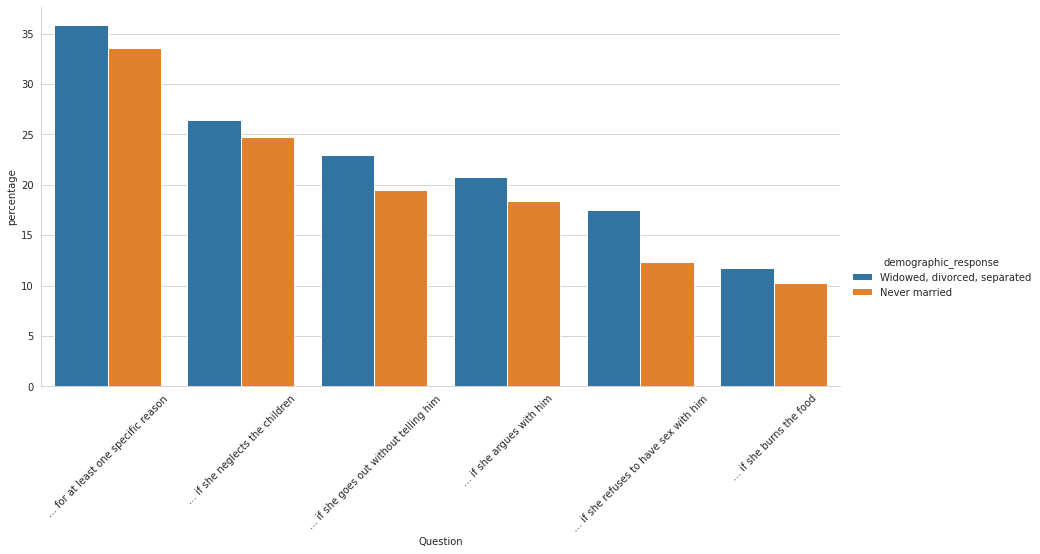

In [ ]:

desired_responses = ['Widowed, divorced, separated', 'Never married']
desired_gender = 'F'


df_desired = df[(df['demographic_response'].isin(desired_responses)) & (df['Gender'] == desired_gender)]


df_agg = df_desired.groupby(['Question', 'demographic_response'])['percentage'].mean().reset_index()
df_agg = df_agg.sort_values(['Question', 'percentage'], ascending=[True, False])


df_agg = df_agg.sort_values(by='percentage', ascending=False)


sns.catplot(x='Question', y='percentage', hue='demographic_response', kind='bar', data=df_agg, height=6, aspect=2, errcolor='black', errwidth=1.5)
plt.xticks(rotation=45)
plt.show()




*   The plot shows the percentage of individuals who agreed to different levels of violence based on their marital status and gender.
*   
Among females who are widowed, divorced, or separated, there is a higher percentage of individuals who agreed to violence compared to females who have never been married





---



# 8)

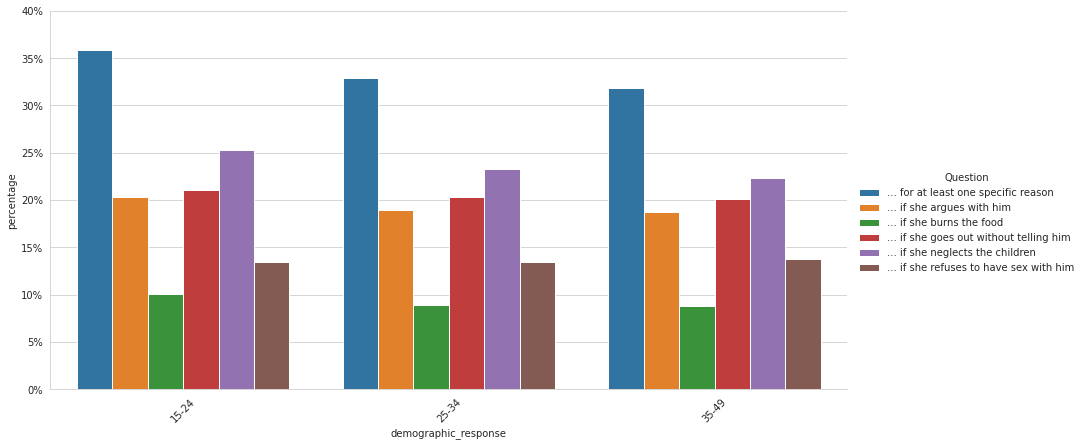

In [ ]:
import seaborn as sns

# Filter the dataframe to only include rows with demographic_question = 'Age'
df_age = df[df['demographic_question'] == 'Age']

# Calculate the mean percentage of violence for each age group
df_age_means = df_age.groupby(['demographic_response', 'Question'])['percentage'].mean().reset_index()

# Sort the age groups in descending order based on mean percentage of violence
age_order = df_age_means.groupby('demographic_response')['percentage'].mean().sort_values(ascending=False).index

# Create a bar chart using Seaborn
sns.set_style('whitegrid')
g = sns.catplot(x='demographic_response', y='percentage', hue='Question', kind='bar', data=df_age_means, order=age_order, height=6, aspect=2, errcolor='black', errwidth=1.5)
g.set_xticklabels(rotation=45)
g.set(ylim=(0, 40))
g.ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.show()




*   The plot shows the mean percentage of individuals who agreed to different levels of violence based on their age. Individuals between the ages of 15 and 25 had the highest mean percentage of agreement to violence compared to other age groups






---



# 9)

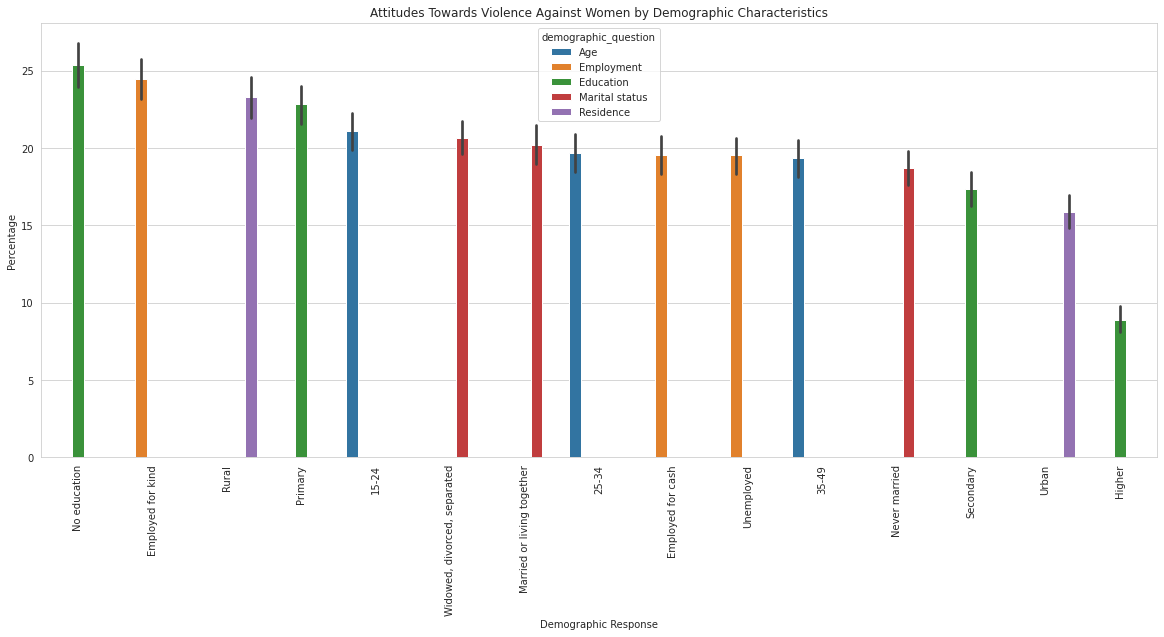

In [ ]:

# Calculate mean percentage for each demographic response
response_means = df.groupby("demographic_response")["percentage"].mean().reset_index()

# Sort demographic responses in ascending order by mean percentage

response_order = response_means.sort_values("percentage", ascending=False)["demographic_response"].values


# Sort original DataFrame based on response_order
df_sorted = df.sort_values(["demographic_response", "demographic_question"])
df_sorted["demographic_response"] = pd.Categorical(df_sorted["demographic_response"], categories=response_order)

# Create plot
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x="demographic_response", y="percentage", hue="demographic_question", data=df_sorted)

# Add a title and axis labels
plt.title("Attitudes Towards Violence Against Women by Demographic Characteristics")
plt.xlabel("Demographic Response")
plt.ylabel("Percentage")
plt.xticks(rotation=90)

plt.show()




*   Individuals with "no education" had a higher mean percentage of agreement to violence compared to those with higher levels of education. This suggests that education may play a role in an individual's attitudes towards violence against wome

